In [1]:
import time
import numpy as np
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import os, errno
from PIL import Image


In [2]:
def erodeimg(image):
    kernel = np.ones((7,7), np.uint8)
    erode = cv2.erode(image, kernel, iterations = 1)
    return erode

In [3]:
def highPixRemove(image):
    img = np.copy(image)
    img[img > 220] = 0
    return img

In [4]:
def contourGenerator(image):
    pix_remove = highPixRemove(image)
    eroded = erodeimg(pix_remove)
#     p_thresh = pixThreshold(eroded)
    
    mask = cv2.inRange(eroded, 5, 255)
    kernel = np.ones((10,10), np.uint8)
    close = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    _, contours, hierarchy = cv2.findContours(close, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    areas = [cv2.contourArea(c) for c in contours]
    
    if (len(contours) >= 1) & np.any(areas):
        max_i = np.argmax(areas)
        contour_ = contours[max_i]
        contour_h = cv2.convexHull(contour_)
        
        M = cv2.moments(contour_)
        hM = cv2.moments(contour_h)
        centroid_ = (int(M["m10"]/M["m00"])), (int(M["m01"]/M["m00"]))
        centroid_h = (int(hM["m10"]/hM["m00"])), (int(hM["m01"]/hM["m00"]))
    else:
        contour_ = ()
        contour_h = ()
        centroid_ = (np.nan, np.nan)
        centroid_h = (np.nan, np.nan)
    return contour_, contour_h, centroid_, centroid_h

In [5]:
def contourGenerator2(image):
    eroded = erodeimg(image)
#     p_thresh = pixThreshold(eroded)
    
    mask = cv2.inRange(eroded, 5, 200)
    kernel = np.ones((10,10), np.uint8)
    close = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    _, contours, hierarchy = cv2.findContours(close, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    areas = [cv2.contourArea(c) for c in contours]
    
    if (len(contours) >= 1) & np.any(areas):
        max_i = np.argmax(areas)
        contour_ = contours[max_i]
        contour_h = cv2.convexHull(contour_)
        
        M = cv2.moments(contour_)
        hM = cv2.moments(contour_h)
        centroid_ = (int(M["m10"]/M["m00"])), (int(M["m01"]/M["m00"]))
        centroid_h = (int(hM["m10"]/hM["m00"])), (int(hM["m01"]/hM["m00"]))
    else:
        contour_ = ()
        contour_h = ()
        centroid_ = (np.nan, np.nan)
        centroid_h = (np.nan, np.nan)
    return contour_, contour_h, centroid_, centroid_h

In [6]:
def contourz(image):
    
    mask = cv2.inRange(image, 5, 200)
    kernel = np.ones((10,10), np.uint8)
    close = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    _, contours, hierarchy = cv2.findContours(close, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    areas = [cv2.contourArea(c) for c in contours]
    
    if (len(contours) >= 1) & np.any(areas):
        max_i = np.argmax(areas)
        contour_ = contours[max_i]
        contour_h = cv2.convexHull(contour_)
        
    
    else:
        contour_ = ()
        contour_h = ()

    return contour_, contour_h

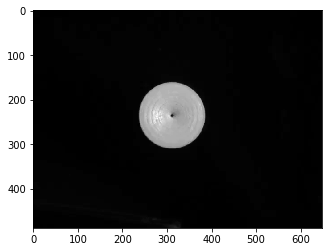

In [18]:
filename = 'L50_c-3_m6'
path = "/Users/Mahad/Documents/Python_Folder/Lightlevel-FlowerShape/Videos"
walk = [(os.path.join(root, file), file[0:-4]) 
        for root, dirs, files in os.walk(path) 
        for file in files 
        if file.endswith(filename + '.mp4')]
talk_ = walk[0][0]
talk = cv2.VideoCapture(talk_)
talk.set(1, 0)
ret, f = talk.read(1)
f_ = cv2.cvtColor(f, cv2.COLOR_BGR2GRAY)
plt.imshow(f_, cmap = 'gray')

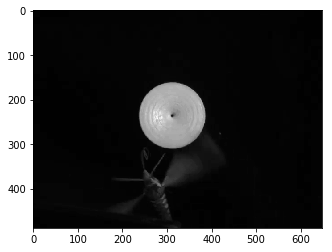

In [42]:
current = 73630+30
talk.set(1,current)
ret, f1 = talk.read(1)
f_1 = cv2.cvtColor(f1, cv2.COLOR_BGR2GRAY)
plt.imshow(f_1, cmap = 'gray')

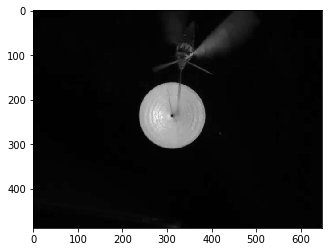

In [49]:
current1 = 74462-90
talk.set(1,current1)
ret, f2 = talk.read(1)
f_2 = cv2.cvtColor(f2, cv2.COLOR_BGR2GRAY)
plt.imshow(f_2, cmap = 'gray')

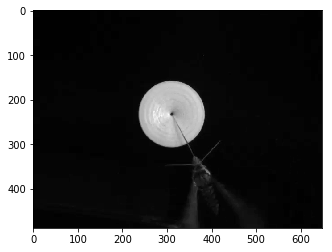

In [10]:
current2 = 39814+8
talk.set(1,current2)
ret, f3 = talk.read(1)
f_3 = cv2.cvtColor(f3, cv2.COLOR_BGR2GRAY)
plt.imshow(f_3, cmap = 'gray')

In [50]:
f1 = highPixRemove(f_1 - f_)
f2 = highPixRemove(f_2 - f_)
f3 = highPixRemove(f_3 - f_)

In [51]:
contour_1, contour_h1, centroid_1, centroid_h1 = contourGenerator(f1)
contour_2, contour_h2, centroid_2, centroid_h2 = contourGenerator(f2)
contour_3, contour_h3, centroid_3, centroid_h3 = contourGenerator(f3)

In [52]:
frame_seqz = frame_seqz = list(range(0,int(talk.get(cv2.CAP_PROP_FRAME_COUNT))))
start_frame = current 
end_frame = current1
frame_seqq = frame_seqz[start_frame:end_frame]
x_list = []
y_list = []
for frame in frame_seqq:
    talk.set(1, frame)
    ret, f = talk.read(1)
    f0 = cv2.cvtColor(f, cv2.COLOR_BGR2GRAY)
    diff = f0 - f_
    diffp = highPixRemove(diff)
    contour_diff, contour_hdiff, centroid_diff, centroid_hdiff = contourGenerator(diff)
    
    
    
    x_diff = centroid_diff[0]
    y_diff = centroid_diff[1]
    x_hdiff = centroid_hdiff[0]
    y_hdiff = centroid_hdiff[1]
    x_list.append(x_diff)
    y_list.append(y_diff)   

# Draw centroids, moth tracks and overlay them on video frame

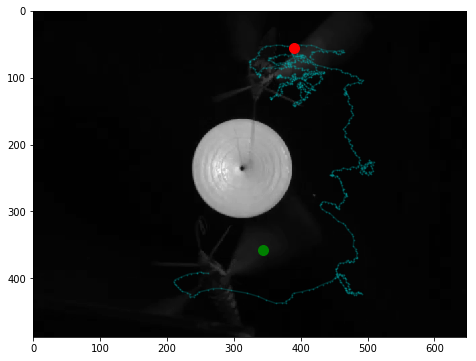

In [53]:
gauss10 = signal.gaussian(10,3)


x_gauss10 = signal.convolve(x_list, gauss10, mode='valid', method = 'direct') / gauss10.sum()
y_gauss10 = signal.convolve(y_list, gauss10, mode = 'valid', method = 'direct') / gauss10.sum()

fig = plt.figure(figsize = (20,6))
plt.plot(x_gauss10,y_gauss10, 'o-', color='c', markersize = 1, alpha = 0.2)
plt.imshow(f_1, cmap = 'gray', alpha = 1)
plt.plot(centroid_1[0],centroid_1[1],'o', color='g', markersize = 10)
plt.imshow(f_2, cmap = 'gray', alpha = 0.5)
plt.plot(centroid_2[0],centroid_2[1],'o', color='r', markersize = 10)
# plt.imshow(f_3, cmap = 'gray', alpha = 0.5)
# plt.plot(centroid_3[0],centroid_3[1],'o', color='m', markersize = 10)

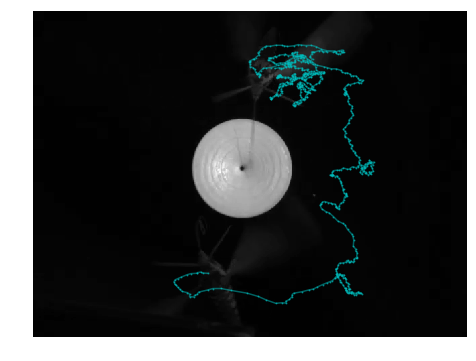

In [57]:
# new_path = '/Users/Mahad/Documents/Python Folder/ImageAnalysis-1/VideoFrameData1'
   
outPath_fig ='/Users/Mahad/Documents/Python_Folder/Lightlevel-FlowerShape/L50_moth_path' 
try:
    os.makedirs(outPath_fig)
except OSError as e:
    if e.errno != errno.EEXIST:
        raise
fig = plt.figure(figsize = (20,6))
plt.plot(x_gauss10,y_gauss10, 'o-', color='c', markersize = 1, alpha = 0.5, zorder = 15)
plt.imshow(f_1, cmap = 'gray', alpha = 1, zorder = 1)
# plt.plot(centroid_1[0],centroid_1[1],'o', color='g', markersize = 5)
plt.imshow(f_2, cmap = 'gray', alpha = 0.55, zorder = 1)
# plt.plot(centroid_2[0],centroid_2[1],'o', color='r', markersize = 5)
# plt.imshow(f_3, cmap = 'gray', alpha = 0.7, zorder = 1)
# plt.plot(centroid_3[0],centroid_3[1],'o', color='m', markersize = 5)
plt.axis('off')
plt.savefig(outPath_fig + '/' + filename + '_LastNoCentroid.png')

In [16]:
files = [
  '/Users/Mahad/Documents/Python Folder/ImageAnalysis-1/VideoFiles c-3_m9/ c-3_m9framenumber30000.png',
  '/Users/Mahad/Documents/Python Folder/ImageAnalysis-1/VideoFiles c-3_m9/ c-3_m9framenumber23000.png',
  '/Users/Mahad/Documents/Python Folder/ImageAnalysis-1/VideoFiles c-3_m9/ c-3_m9framenumber19000.png',
  '/Users/Mahad/Documents/Python Folder/ImageAnalysis-1/VideoFiles c-3_m9/ c-3_m9framenumber19100.png']

result = Image.new("RGB", (800, 800))

for index, file in enumerate(files):
  path = os.path.expanduser(file)
  img = Image.open(path)
  img.thumbnail((400, 400), Image.ANTIALIAS)
  x = index // 2 * 400
  y = index % 2 * 400
  w, h = img.size
  print('pos {0},{1} size {2},{3}'.format(x, y, w, h))
  result.paste(img, (x, y, x + w, y + h))

result.save(os.path.expanduser('~/image.jpg'))
plt.imshow(result)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/Mahad/Documents/Python Folder/ImageAnalysis-1/VideoFiles c-3_m9/ c-3_m9framenumber30000.png'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
# style.use("ggplot")
style.use('seaborn-poster')
from scipy.optimize import curve_fit
import os
import numpy as np
import glob
import scipy as sc

direc = '/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Data_From_Step_5/'

outpath = '/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Data_From_Step_6/'
outpath_figg = '/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Figures_Step6/'
dFrame = pd.read_csv(outpath + 'AllMoths_AllTrials.csv')

def unique(list1):
    unique_list = []
    for x in list1:
        if x not in unique_list:
            unique_list.append(x)
    return(unique_list)
namez = dFrame.name
names = list(namez)
nam = unique(names)
nam

# something that loops through all of the videos (maybe only just the frames contained in the in out part) and saves the path during that window into an excel file (which Ill rip how from steps 5/6). Needs this by Saturday

for name in nam:
    i = 0
    print(name)
    filename = name
    path = "/Users/Mahad/Documents/Python_Folder/Lightlevel-FlowerShape/Videos"
    walk = [(os.path.join(root, file), file[0:-4]) 
            for root, dirs, files in os.walk(path) 
            for file in files 
            if file.endswith(filename + '.mp4')]
    talk_ = walk[0][0]
    talk = cv2.VideoCapture(talk_)
    talk.set(1, 0)
    ret, f = talk.read(1)
    f_ = cv2.cvtColor(f, cv2.COLOR_BGR2GRAY)
#     plt.imshow(f_, cmap = 'gray')
    frame_seqz = frame_seqz = list(range(0,int(talk.get(cv2.CAP_PROP_FRAME_COUNT))))
    In = unique(list(dFrame[(dFrame.name == name)  & (dFrame.In_Frame.notnull())].In_Frame))
    Out = unique(list(dFrame[(dFrame.name == name) & (dFrame.In_Frame.notnull())].Out_Frame))
    In_out = list(zip(In,Out))
    Moth_InOut = list(In_out)
    for element in Moth_InOut:
        start_frame = Moth_InOut[i][0]
        end_frame = Moth_InOut[i][1]
        frame_seqq = frame_seqz[start_frame:end_frame]
        x_list = []
        y_list = []
        framez = []
        i+=1
        print(start_frame)
        for frame in frame_seqq:
            talk.set(1, frame)
            ret, f = talk.read(1)
            f0 = cv2.cvtColor(f, cv2.COLOR_BGR2GRAY)
            diff  = cv2.subtract(f0, f_)
            
            contour_diff, contour_hdiff, centroid_diff, centroid_hdiff = contourGenerator(diff)

            x_diff = centroid_diff[0]
            y_diff = centroid_diff[1]
            x_hdiff = centroid_hdiff[0]
            y_hdiff = centroid_hdiff[1]
            framez.append(frame)
            x_list.append(x_diff)
            y_list.append(y_diff)  
    
    new_df = (pd.DataFrame({'X position' : x_list, 'Y position' : y_list, 'Frame Number' : framez}))
    # # print(Lightlevel + '\t' + "has a total of" + '\t'+ str(ctr) + '\t' + "moths")
    new_df.to_csv(outpath + name + "Centroid_Data.csv")


Lightlevel = ['L0.1', 'L50']


for Lightlevel in Lightlevel:
    
    Light_specific_file = glob.glob(outpath + '*Centroid_Data*.csv')
    print(Light_specific_file)
       
    # get the data together and save as single dataset
    
    
    df2=[]
    df3=[]
    df4=[]
    df5=[]


    ctr = 0
    for fpath in Light_specific_file:
        df = pd.read_csv(fpath)
        print(fpath)
        FrameNum= df['Frame Number']
        trialNum = df.index
        fname = os.path.basename(fpath)[:-17]
        print(fname)
        names = [fname]*len(trialNum)
        X_pos = df['X position']
        Y_pos = df['Y position']

        df2.extend(FrameNum)
        df3.extend(names)
        df4.extend(X_pos)
        df5.extend(Y_pos)
        ctr+=1
        print(ctr)

    new_df = (pd.DataFrame({ 'FrameNum': df2, 'name' : df3, 'X_pos' : df4, 'Y_pos' : df5}))
    new_df.to_csv(outpath + Lightlevel + "AllMoth_Centroid.csv")
    
    
    